# Project Scope

With COVID-19 drastically changing the daily lives of city dwellers, we are banking on an increased interest in bikes as transportation.  While not everyone is able to or interested in owning their own, we believe a bikeshare model will provide service for citizens, as well as a stable business opportunity for our company.  

### How many bikes will ne needed?

We want to ensure we have enough bicycles available at any given time.  We need to account for seasonal interest, assuming growth in nicer weather and shirnkage during colder months.


Too few, and we risk turning off customers by lack of availability when they are sought

Too many, and we run the chance of not recouping expenses from initial costs, maintenance, staffing...etc

### The variables in question.

Looking at two years of DC metro bike share, we have identified some very helpful variables to reach our goals

* Temperature and Ambient temperature ('temp','atemp')
    * A large signifier of interest in riding, especially for the casual rider
* Casual and Registered ridersghip ('casual','registered')
    * Casual riders are those who can be thought of as the tourist or leisurely rider.  This numbers can be expected to rise with nicer (warmer) temperatures
    * Registered riders are those who are likely commuters, who will likely be riding in unfavorable conditions as much as favorable conditions

In [1]:
""" 
Master list of imports
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

LineR = LinearRegression()

In [2]:
df_dirty = pd.read_csv(r"C:\Users\marce\Documents\Graduate School\Data 602\Linear Regression HW\Bike\Bikeshare.csv")
df = df_dirty.dropna()
df = df[['temp', 'atemp' ,'hum','windspeed','casual','registered','cnt']]

In [3]:
X_train, X_test = train_test_split(df, test_size = 0.2)

print("Training Data Shape:" ,X_train.shape,"Testing Data Shape:", X_test.shape)

Training Data Shape: (584, 7) Testing Data Shape: (146, 7)


# This is the modeling framework for each set of feaures.  

* Variables and Arguments needed:
    * train : the training set
    * test : the test set
    * feat : the features used in training
    * y_feat : the feature we are trying to predict

In [4]:
"""
train: the training set
test: the test set
feat: features must be in brackets ['feat1','feat2', ...etc]
"""

def LR_fit(train, test, feat, y_feat):
        
    LineR.fit(train[feat] , train.cnt)
    print("Intercept::", LineR.intercept_, "Coefficient", LineR.coef_)
    r_square = LineR.score(train[feat], train.cnt)
    print("R-squared value: ", r_square)
    
    X = train[feat]
    y = train.cnt
    X = sm.add_constant(X)
    mod = sm.OLS(y, X, hasconst= True)
    res = mod.fit()
    print(res.summary())
    
    Xtest = test[feat]
    ytest = test.cnt
    Xtest = sm.add_constant(Xtest)
    y_predict = res.predict(Xtest)
    print("Predicted y values", y_predict)    
    residuals = res.resid

    y_pred = res.predict(X)
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='red', label='0')
    plt.xlabel('predicted values')
    plt.ylabel('residuals')
    plt.tight_layout()

## Regression temp/atemp

Intercept:: 837.7362158063588 Coefficient [ 37.71682012 124.97416267]
R-squared value:  0.4270920454474997
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     216.6
Date:                Tue, 22 Sep 2020   Prob (F-statistic):           5.29e-71
Time:                        09:55:28   Log-Likelihood:                -5090.9
No. Observations:                 584   AIC:                         1.019e+04
Df Residuals:                     581   BIC:                         1.020e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

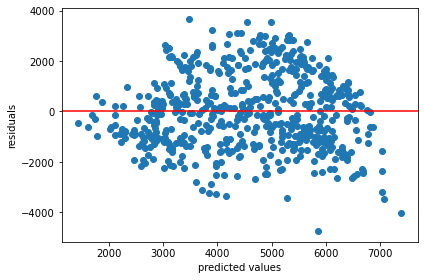

In [5]:
LR_fit(X_train, X_test, ['temp','atemp'], )

## Regression casual riders

Intercept:: 2931.798524142033 Coefficient [1.91287435]
R-squared value:  0.45116074405616025
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     478.4
Date:                Tue, 22 Sep 2020   Prob (F-statistic):           7.41e-78
Time:                        09:55:28   Log-Likelihood:                -5078.4
No. Observations:                 584   AIC:                         1.016e+04
Df Residuals:                     582   BIC:                         1.017e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

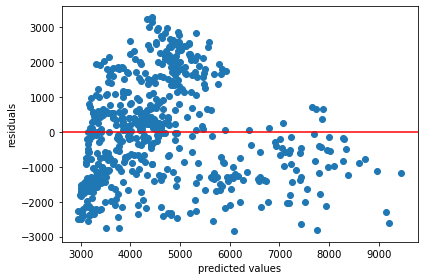

In [6]:
LR_fit(X_train, X_test, ['casual'])

## Regression registered riders

Intercept:: 220.20085246932922 Coefficient [1.17274112]
R-squared value:  0.8961444067993417
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     5022.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):          2.11e-288
Time:                        09:55:36   Log-Likelihood:                -4592.3
No. Observations:                 584   AIC:                             9189.
Df Residuals:                     582   BIC:                             9197.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

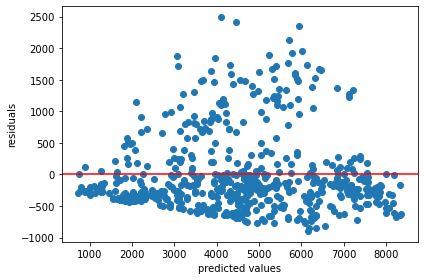

In [8]:
LR_fit(X_train, X_test, ['registered'])

## Combined regression (temp, atemp, casual, registered

Intercept:: -1.8189894035458565e-12 Coefficient [ 5.60310242e-13 -6.25684460e-13  1.00000000e+00  1.00000000e+00]
R-squared value:  1.0
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.184e+32
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        09:55:41   Log-Likelihood:                 15227.
No. Observations:                 584   AIC:                        -3.044e+04
Df Residuals:                     579   BIC:                        -3.042e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.

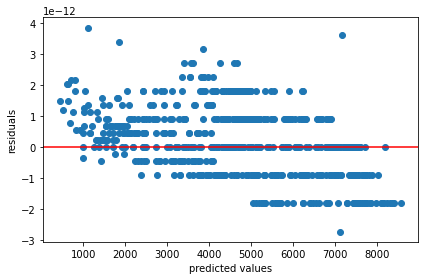

In [9]:
LR_fit(X_train, X_test, ['atemp','temp','casual','registered'])